## 모델링 최종

### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./csv/수명주기붙힌거공백제거v3.csv',encoding='cp949')
df = df[['회사명','거래소코드','회계년도','총자본영업이익율','자기자본순이익율','유동자산회전율','총자본투자효율','매출채권회전율','총자본회전율',
         '유형자산회전율','매출액총이익율','순운전자본비율','재고자산_대_유동자산비율','총자산증가율','유동비율','매출원가감소율여부','배당금감소율여부',
         '변화율여부','직원감소율여부','자본증가율여부','투자활동감소율여부','기업수명주기','회생기업2']]
df['회생기업2'] = df['회생기업2'].fillna(0)
df['거래소코드'] = df['거래소코드'].astype(int)
df = df.sort_values(by='회계년도')
df = df.reset_index(drop=True)
df['회계년도'] = df['회계년도'].astype(int)
df

,회사명,거래소코드,회계년도,총자본영업이익율,자기자본순이익율,유동자산회전율,총자본투자효율,매출채권회전율,총자본회전율,유형자산회전율,...,총자산증가율,유동비율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기,회생기업2
0,(주)CMG제약,58820,201112,2.37,-8.28,1.25,12.72,2.29,0.66,1.77,...,1.98,200.97,1,0,0,0,0,0,1,0
1,(주)디아크,78590,201112,0.00,45.64,4.62,0.00,8.99,2.57,6.86,...,13.04,111.87,0,0,0,0,0,0,4,0
2,(주)옵트론텍,82210,201112,7.53,11.09,1.34,16.57,3.48,0.64,1.72,...,3.11,91.68,0,0,0,0,0,1,3,0
3,상신이디피(주),91580,201112,11.58,15.46,3.75,34.58,9.93,1.56,2.84,...,11.97,100.91,0,0,0,0,0,0,2,0
4,(주)오픈베이스,49480,201112,2.82,3.60,2.02,31.80,5.26,1.55,22.67,...,1.83,167.53,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,(주)에스에이엠티,31330,201912,11.10,16.62,6.21,18.71,11.60,4.00,97.11,...,-11.14,365.27,0,0,0,0,0,0,3,1
8744,에스디엔(주),99220,201912,2.34,5.59,1.49,10.72,2.55,0.51,1.97,...,15.14,99.21,0,0,0,0,0,1,2,0
8745,(주)에스에이티,60540,201912,7.74,11.20,2.61,27.48,10.12,1.08,3.22,...,9.86,152.28,0,0,0,0,0,0,2,1
8746,(주)에스비에스,34120,201912,1.14,3.44,1.35,26.18,3.00,0.74,2.65,...,30.29,182.42,0,1,0,0,0,0,5,1


## 피쳐와 레이블 나누기

### 타겟만 나누고 데이터는 스케일링 때 나눕니다

In [11]:
target = df.iloc[:,22]

In [12]:
target

0       0
1       0
2       0
3       0
4       0
       ..
8743    1
8744    0
8745    1
8746    1
8747    0
Name: 회생기업2, Length: 8748, dtype: int64

In [13]:
# 어떤 컬럼 있는지 확인
df.columns

Index(['회사명', '거래소코드', '회계년도', '총자본영업이익율', '자기자본순이익율', '유동자산회전율', '총자본투자효율',
       '매출채권회전율', '총자본회전율', '유형자산회전율', '매출액총이익율', '순운전자본비율', '재고자산_대_유동자산비율',
       '총자산증가율', '유동비율', '매출원가감소율여부', '배당금감소율여부', '변화율여부', '직원감소율여부',
       '자본증가율여부', '투자활동감소율여부', '기업수명주기', '회생기업2'],
      dtype='object')

### 스케일링을 위해 데이터를 나눠줍니다

In [14]:
# 기간을 얼마나 나누게 될까요~?
x_train = df.loc[:5610] # 2011 ~ 2016년
x_test = df.loc[5611:] # 2017 ~ 2019년
y_train = target.loc[:5610] # 2011 ~ 2016년
y_test = target.loc[5611:] # 2017 ~ 2019년

In [15]:
x_train

,회사명,거래소코드,회계년도,총자본영업이익율,자기자본순이익율,유동자산회전율,총자본투자효율,매출채권회전율,총자본회전율,유형자산회전율,...,총자산증가율,유동비율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기,회생기업2
0,(주)CMG제약,58820,201112,2.37,-8.28,1.25,12.72,2.29,0.66,1.77,...,1.98,200.97,1,0,0,0,0,0,1,0
1,(주)디아크,78590,201112,0.00,45.64,4.62,0.00,8.99,2.57,6.86,...,13.04,111.87,0,0,0,0,0,0,4,0
2,(주)옵트론텍,82210,201112,7.53,11.09,1.34,16.57,3.48,0.64,1.72,...,3.11,91.68,0,0,0,0,0,1,3,0
3,상신이디피(주),91580,201112,11.58,15.46,3.75,34.58,9.93,1.56,2.84,...,11.97,100.91,0,0,0,0,0,0,2,0
4,(주)오픈베이스,49480,201112,2.82,3.60,2.02,31.80,5.26,1.55,22.67,...,1.83,167.53,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,(주)원익,32940,201612,1.48,91.96,2.11,55.69,4.04,0.40,2.72,...,48.04,61.24,0,0,0,0,0,0,4,0
5607,(주)셀트리온제약,68760,201612,-3.30,-8.23,0.65,5.74,1.67,0.23,0.49,...,-5.29,237.39,0,1,0,1,0,0,5,0
5608,(주)이엔코퍼레이션,66980,201612,3.54,1.69,0.36,2.81,1.39,0.17,1.06,...,168.35,178.33,0,0,1,1,0,0,2,0
5609,(주)이지,37370,201612,0.89,-0.23,2.83,25.57,8.31,1.49,3.61,...,-0.83,161.55,0,0,0,0,0,0,1,0


### 스케일링 사용할 데이터와 반정형 데이터 나누기

In [17]:
df_feature = x_train.iloc[:,3:15] # 스케일링을 사용할 데이터
df_semi = x_train.iloc[:,15:22] # 반정형 역시 따로 뺀다

In [18]:
df_feature

,총자본영업이익율,자기자본순이익율,유동자산회전율,총자본투자효율,매출채권회전율,총자본회전율,유형자산회전율,매출액총이익율,순운전자본비율,재고자산_대_유동자산비율,총자산증가율,유동비율
0,2.37,-8.28,1.25,12.72,2.29,0.66,1.77,41.83,28.23,17.88,1.98,200.97
1,0.00,45.64,4.62,0.00,8.99,2.57,6.86,14.36,6.42,6.71,13.04,111.87
2,7.53,11.09,1.34,16.57,3.48,0.64,1.72,21.81,-4.35,43.32,3.11,91.68
3,11.58,15.46,3.75,34.58,9.93,1.56,2.84,14.77,0.36,36.08,11.97,100.91
4,2.82,3.60,2.02,31.80,5.26,1.55,22.67,22.83,31.29,5.61,1.83,167.53
...,...,...,...,...,...,...,...,...,...,...,...,...
5606,1.48,91.96,2.11,55.69,4.04,0.40,2.72,39.13,-10.52,30.25,48.04,61.24
5607,-3.30,-8.23,0.65,5.74,1.67,0.23,0.49,40.03,22.50,38.33,-5.29,237.39
5608,3.54,1.69,0.36,2.81,1.39,0.17,1.06,100.00,20.07,0.14,168.35,178.33
5609,0.89,-0.23,2.83,25.57,8.31,1.49,3.61,9.45,20.28,37.00,-0.83,161.55


### 테스트 데이터 나누기

In [19]:
# 테스트할 X를 나눕니다
x_test = x_test.iloc[:, 3:22]

In [20]:
x_test

,총자본영업이익율,자기자본순이익율,유동자산회전율,총자본투자효율,매출채권회전율,총자본회전율,유형자산회전율,매출액총이익율,순운전자본비율,재고자산_대_유동자산비율,총자산증가율,유동비율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기
5611,1.37,0.89,3.19,15.83,6.10,1.24,3.37,16.78,-20.02,31.99,5.31,65.54,0,1,0,0,0,0,3
5612,-0.27,-5.77,3.66,3.76,7.13,1.15,5.41,12.87,2.21,9.60,5.28,107.42,0,0,0,0,0,0,5
5613,0.00,1.80,1.73,0.00,4.18,0.98,3.27,15.14,30.14,22.55,-49.14,158.77,0,0,0,0,0,0,1
5614,5.20,5.19,3.77,54.65,5.74,1.26,2.43,100.00,7.33,0.00,5.30,127.18,0,0,0,0,0,0,2
5615,0.00,-29.52,2.64,0.00,3.69,2.09,13.27,9.35,41.42,11.11,-3.86,222.31,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,11.10,16.62,6.21,18.71,11.60,4.00,97.11,4.21,43.99,28.77,-11.14,365.27,0,0,0,0,0,0,3
8744,2.34,5.59,1.49,10.72,2.55,0.51,1.97,26.67,-0.28,27.18,15.14,99.21,0,0,0,0,0,1,2
8745,7.74,11.20,2.61,27.48,10.12,1.08,3.22,16.69,14.74,19.82,9.86,152.28,0,0,0,0,0,0,2
8746,1.14,3.44,1.35,26.18,3.00,0.74,2.65,19.61,25.96,0.37,30.29,182.42,0,1,0,0,0,0,5


### 학습데이터 Standard Scalering 하기

In [21]:
# 기간을 나누기전에 스케일링 부터 합시당!
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
ss_sc = SS.fit_transform(df_feature)
ss_sc2 = pd.DataFrame(ss_sc)
ss_sc2.columns=['총자본영업이익율', '자기자본순이익율', '유동자산회전율', '총자본투자효율',
       '매출채권회전율', '총자본회전율', '유형자산회전율', '매출액총이익율', '순운전자본비율', '재고자산_대_유동자산비율',
       '총자산증가율', '유동비율']
ss_sc2 = pd.concat([ss_sc2,df_semi],axis=1) # 반정형도 붙힙니다.

In [22]:
ss_sc2

,총자본영업이익율,자기자본순이익율,유동자산회전율,총자본투자효율,매출채권회전율,총자본회전율,유형자산회전율,매출액총이익율,순운전자본비율,재고자산_대_유동자산비율,총자산증가율,유동비율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기
0,0.192330,0.018895,-0.605973,0.059265,-0.198582,-0.463085,-0.109414,0.942823,0.561251,-0.344372,-0.075906,-0.056411,1,0,0,0,0,0,1
1,-0.146091,0.531422,2.125446,-0.717173,0.118295,2.976398,-0.060292,-0.309796,-0.301120,-1.007432,0.028810,-0.178958,0,0,0,0,0,0,4
2,0.929147,0.203013,-0.533027,0.294272,-0.142301,-0.499100,-0.109896,0.029921,-0.726967,1.165765,-0.065207,-0.206727,0,0,0,0,0,1,3
3,1.507462,0.244552,1.420302,1.393615,0.162752,1.157614,-0.099088,-0.291100,-0.540733,0.735993,0.018679,-0.194032,0,0,0,0,0,0,2
4,0.256588,0.131818,0.018120,1.223922,-0.058116,1.139606,0.092286,0.076432,0.682244,-1.072728,-0.077326,-0.102404,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,0.065244,0.971709,0.091066,2.682185,-0.115816,-0.931286,-0.100246,0.819704,-0.970930,0.389920,0.360189,-0.248594,0,0,0,0,0,0,4
5607,-0.617311,0.019370,-1.092279,-0.366799,-0.227905,-1.237418,-0.121767,0.860743,0.334686,0.869555,-0.144738,-0.006320,0,1,0,1,0,0,5
5608,0.359399,0.113663,-1.327327,-0.545648,-0.241148,-1.345465,-0.116266,3.595345,0.238603,-1.397432,1.499281,-0.087550,0,0,1,1,0,0,2
5609,-0.019005,0.095413,0.674633,0.843638,0.086134,1.031560,-0.091657,-0.533689,0.246907,0.790605,-0.102511,-0.110629,0,0,0,0,0,0,1


#### 잘나누어줬는지 확인

In [23]:
print('X 테스트 데이터 :')
print(x_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
      총자본영업이익율  자기자본순이익율  유동자산회전율  총자본투자효율  매출채권회전율  총자본회전율  유형자산회전율  매출액총이익율  \
5611      1.37      0.89     3.19    15.83     6.10    1.24     3.37    16.78   
5612     -0.27     -5.77     3.66     3.76     7.13    1.15     5.41    12.87   
5613      0.00      1.80     1.73     0.00     4.18    0.98     3.27    15.14   
5614      5.20      5.19     3.77    54.65     5.74    1.26     2.43   100.00   
5615      0.00    -29.52     2.64     0.00     3.69    2.09    13.27     9.35   
...        ...       ...      ...      ...      ...     ...      ...      ...   
8743     11.10     16.62     6.21    18.71    11.60    4.00    97.11     4.21   
8744      2.34      5.59     1.49    10.72     2.55    0.51     1.97    26.67   
8745      7.74     11.20     2.61    27.48    10.12    1.08     3.22    16.69   
8746      1.14      3.44     1.35    26.18     3.00    0.74     2.65    19.61   
8747     -2.00    -98.70     1.01     3.10     2.86    0.17     0.28     5.54   

      순운전자본비율  

#### 기본데이터 분포

In [24]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(ss_sc2.shape, x_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(5611, 19), 테스트 세트 Shape:(3137, 19)
 학습 세트 레이블 값 분포 비율
0    0.87774
1    0.12226
Name: 회생기업2, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.384245
1    0.174835
Name: 회생기업2, dtype: float64


### 오버샘플링을 해봅시다

#### SMOTE
- SMOTE(Synthetic Minority Over-sampling Technique) 방법도 ADASYN 방법처럼 데이터를 생성하지만 생성된 데이터를 무조건 소수 클래스라고 하지 않고 분류 모형에 따라 분류한다.

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
x_train_over,y_train_over = smote.fit_resample(ss_sc2,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (5611, 23) (5611,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (9850, 19) (9850,)
SMOTE 적용 후 레이블 값 분포: 
 0    4925
1    4925
Name: 회생기업2, dtype: int64


In [26]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train_over.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(x_train_over.shape, x_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train_over.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(9850, 19), 테스트 세트 Shape:(3137, 19)
 학습 세트 레이블 값 분포 비율
0    0.5
1    0.5
Name: 회생기업2, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.218883
1    0.099594
Name: 회생기업2, dtype: float64


### 언더샘플링을 해봅시다

#### Neighbourhood Cleaning Rule
- Neighbourhood Cleaning Rule 방법은 CNN(Condensed Nearest Neighbour) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것이다.

In [29]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

ncr = NeighbourhoodCleaningRule()
x_train_ncr, y_train_ncr = ncr.fit_resample(ss_sc2, y_train)
print('NCR 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('NCR 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_ncr.shape, y_train_ncr.shape)
print('NCR 적용 후 레이블 값 분포: \n', pd.Series(y_train_ncr).value_counts())

NCR 적용 전 학습용 피처/레이블 데이터 세트:  (5611, 23) (5611,)
NCR 적용 후 학습용 피처/레이블 데이터 세트:  (4413, 19) (4413,)
NCR 적용 후 레이블 값 분포: 
 0    3727
1     686
Name: 회생기업2, dtype: int64


In [30]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train_ncr.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(x_train_ncr.shape, x_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train_ncr.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(4413, 19), 테스트 세트 Shape:(3137, 19)
 학습 세트 레이블 값 분포 비율
0    0.84455
1    0.15545
Name: 회생기업2, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.488557
1    0.222298
Name: 회생기업2, dtype: float64


## 본격적인 예측 모델 시작

### 로지스틱 회귀분석

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import TimeSeriesSplit 

lg = LogisticRegression() # 로지스틱회귀 준비
param_grid = [{'C':np.linspace(0.1,10,100)}] # 최적의 하이퍼 파리미터 조정
gs = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy',cv=TimeSeriesSplit(n_splits=6),n_jobs=1) # 시계열기반이라 KFold가 아닌 TimeSeriesSplit 사용
gs.fit(ss_sc2, y_train) # 학습
best_est = gs.best_estimator_ # 최적의 값 추출
predictions = best_est.predict(x_test) # 예측하기
accuracy = accuracy_score(y_test, predictions) # 정확도 확인
print('GridSearchCV 최적 하이퍼 파라미터 :', gs.best_params_)
print('GridSearchCV 최고 정확도 :{0:.4f}'.format(gs.best_score_))
print('테스트 세트에서의 LogisticRegression 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'C': 0.1}
GridSearchCV 최고 정확도 :nan
테스트 세트에서의 LogisticRegression 정확도 : 0.7338


In [33]:
# 혼돈행렬 확인
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}'.format(accuracy, precision, recall,f1))
    
get_clf_eval(y_test, predictions)

오차 행렬
[[1527  629]
 [ 206  775]]
정확도: 0.7338, 정밀도: 0.5520, 재현율: 0.7900, f1: 0.6499


오차 행렬 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

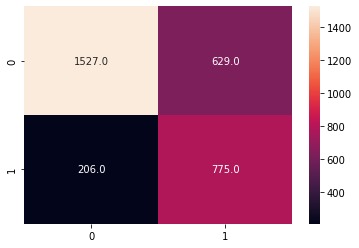

In [34]:
# 시각적인 모습을 보이는게 좋을거 같아 만들어봤습니다
# 오차행렬 시각화
import seaborn as sns
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True,fmt=".1f")
plt.show

추가적인 검증평가

In [35]:
# 추가적인 검증평가
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      2156
           1       0.55      0.79      0.65       981

    accuracy                           0.73      3137
   macro avg       0.72      0.75      0.72      3137
weighted avg       0.78      0.73      0.74      3137



### ROC AUC 커브

In [36]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = gs.predict_proba(x_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [   1    2    3 ... 1001 1002 1003]
샘플 index로 추출한 임곗값:  [1. 1. 1. ... 0. 0. 0.]
샘플 임곗값별 FPR:  [0.011 0.012 0.013 ... 0.988 0.998 1.   ]
샘플 임곗값별 TPR:  [0.018 0.02  0.021 ... 1.    1.    1.   ]


In [37]:
from sklearn.metrics import roc_auc_score

pred_proba = gs.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.8036


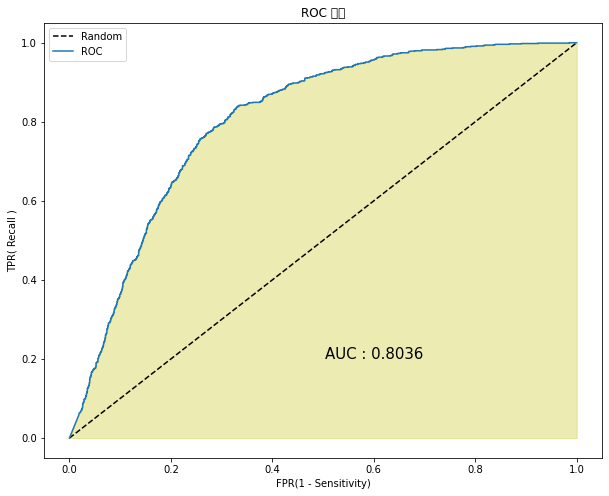

In [45]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : 0.8036', xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

### 로지스틱 하이퍼파라미터 수동 조작

In [39]:
lg1 = LogisticRegression(C=1)
lg1.fit(ss_sc2, y_train)
predictions_lg = best_est.predict(x_test)
accuracy = accuracy_score(y_test, predictions_lg)
print('테스트 세트에서의 LogisticRegression 정확도 : {0:.4f}'.format(accuracy))
get_clf_eval(y_test, predictions_lg)

테스트 세트에서의 LogisticRegression 정확도 : 0.7338
오차 행렬
[[1527  629]
 [ 206  775]]
정확도: 0.7338, 정밀도: 0.5520, 재현율: 0.7900, f1: 0.6499


In [144]:
# 수치로 혼돈행렬 확인하기
get_clf_eval(y_test, predictions_lg)

오차 행렬
[[1527  629]
 [ 206  775]]
정확도: 0.7338, 정밀도: 0.5520, 재현율: 0.7900, f1: 0.6499


In [40]:
# 성능 검증하기
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

print(classification_report(y_test,predictions_lg))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      2156
           1       0.55      0.79      0.65       981

    accuracy                           0.73      3137
   macro avg       0.72      0.75      0.72      3137
weighted avg       0.78      0.73      0.74      3137



<function matplotlib.pyplot.show(close=None, block=None)>

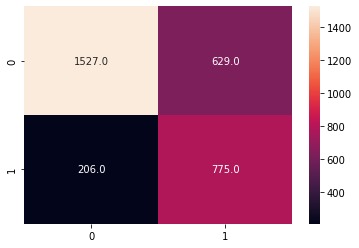

In [41]:
# 시각화로 혼동행렬 보기
cm = confusion_matrix(y_test,predictions_lg)
sns.heatmap(cm, annot=True,fmt=".1f")
plt.show

### ROC AUC 커브

In [42]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = lg1.predict_proba(x_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 2

In [43]:
from sklearn.metrics import roc_auc_score

pred_proba = lg1.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.8050


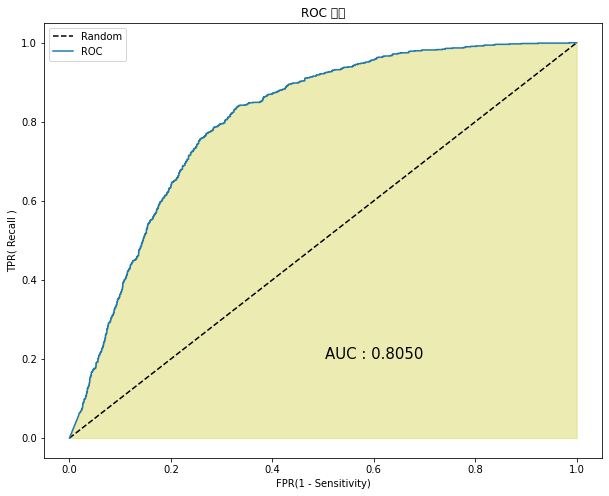

In [46]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : 0.8050', xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

### 랜덤 포레스트

In [47]:
# 랜덤포레스트 + 그리드서치로 모델 학습
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=255)
param_grid_rf = [{'n_estimators': range(5,50,100), 'max_depth': range(3,4,5),'min_samples_leaf': range(1,2,3), 'max_features': range(1,4)}] # 최적의 하이퍼파라미터 조정
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=TimeSeriesSplit(n_splits=6), n_jobs=1) # 시계열기반이라 KFold가 아닌 TimeSeriesSplit 사용
rf_gs.fit(ss_sc2, y_train) # 학습
best_est = rf_gs.best_estimator_ # 최적의 값 찾기
predictions_rf = best_est.predict(x_test) # 학습하기
accuracy = accuracy_score(y_test, predictions_rf) # 정확도 보기
print('GridSearchCV 최적 하이퍼 파라미터 :', rf_gs.best_params_)
print('GridSearchCV 최고 정확도 :{0:.4f}'.format(rf_gs.best_score_))
print('테스트 세트에서의 RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy))
get_clf_eval(y_test, predictions_rf)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1, 'n_estimators': 5}
GridSearchCV 최고 정확도 :0.8577
테스트 세트에서의 RandomForestClassifier 정확도 : 0.7051
오차 행렬
[[1525  631]
 [ 294  687]]
정확도: 0.7051, 정밀도: 0.5212, 재현율: 0.7003, f1: 0.5977


In [48]:
# 랜포 성능검증
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      2156
           1       0.52      0.70      0.60       981

    accuracy                           0.71      3137
   macro avg       0.68      0.70      0.68      3137
weighted avg       0.74      0.71      0.71      3137



<function matplotlib.pyplot.show(close=None, block=None)>

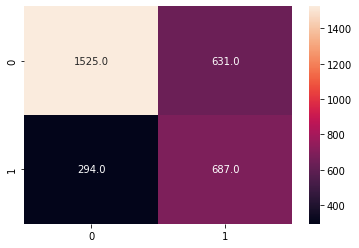

In [49]:
# 혼돈행렬 시각화
cm = confusion_matrix(y_test,predictions_rf)
sns.heatmap(cm, annot=True,fmt=".1f")
plt.show

### ROC AUC 커브

In [50]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = rf_gs.predict_proba(x_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
샘플 index로 추출한 임곗값:  [0.61 0.59 0.58 0.58 0.57 0.55 0.53 0.53 0.53 0.5  0.5  0.49 0.48 0.46
 0.46 0.45 0.44 0.43 0.43 0.42 0.42 0.42 0.4  0.4  0.4  0.39 0.37 0.37
 0.35 0.35 0.35 0.34 0.32 0.32 0.32 0.3  0.29 0.29 0.27 0.27 0.27 0.27
 0.26 0.26 0.26 0.25 0.24 0.23 0.23 0.22 0.22 0.22 0.21 0.19 0.17 0.17
 0.15 0.14 0.14 0.14 0.13 0.13 0.12 0.11 0.09 0.08 0.07 0.06 0.06 0.04
 0.03 0.02]
샘플 임곗값별 FPR:  [0.056 0.058 0.067 0.092 0.101 0.107 0.108 0.167 0.292 0.293 0.318 0.4
 0.401 0.416 0.418 0.422 0.423 0.424 0.428 0.458 0.459 0.484 0.527 0.527
 0.528 0.529 0.53  0.537 0.538 0.538 0.542 0.542 0.544 0.544 0.553 0.558
 0.57  0.57  0.572 0.572 0.573 0.575 0.586 0.587 0.604 0.604 0.605 0.605
 0.605 0.609 0.773 0.774 0.782 0.783 0.819 0.82  0.821 0.828 0.8

In [54]:
from sklearn.metrics import roc_auc_score

pred_proba = rf_gs.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.7325


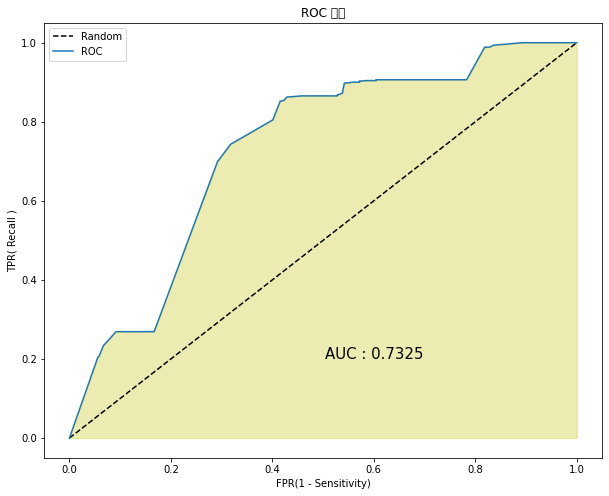

In [55]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : 0.7325', xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

#### 랜포 하이퍼파라미터 수동조작

In [135]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth = 1, max_features = 1, min_samples_leaf = 3, n_estimators = 100)
rf_clf.fit(ss_sc2, y_train)
w_preds = rf_clf.predict(x_test)

get_clf_eval(y_test, w_preds)

오차 행렬
[[2156    0]
 [ 981    0]]
정확도: 0.6873, 정밀도: 0.0000, 재현율: 0.0000, f1: 0.0000


In [64]:
# 랜포 성능검증
print(classification_report(y_test,w_preds))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81      2156
           1       0.00      0.00      0.00       981

    accuracy                           0.69      3137
   macro avg       0.34      0.50      0.41      3137
weighted avg       0.47      0.69      0.56      3137



<function matplotlib.pyplot.show(close=None, block=None)>

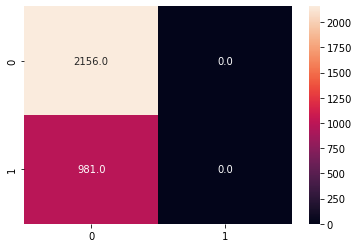

In [65]:
# 혼돈행렬 시각화
cm = confusion_matrix(y_test,w_preds)
sns.heatmap(cm, annot=True,fmt=".1f")
plt.show

### ROC AUC 커브

In [66]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = rf_clf.predict_proba(x_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [1]
샘플 index로 추출한 임곗값:  [0.12]
샘플 임곗값별 FPR:  [1.]
샘플 임곗값별 TPR:  [1.]


In [67]:
from sklearn.metrics import roc_auc_score

pred_proba = rf_clf.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.5000


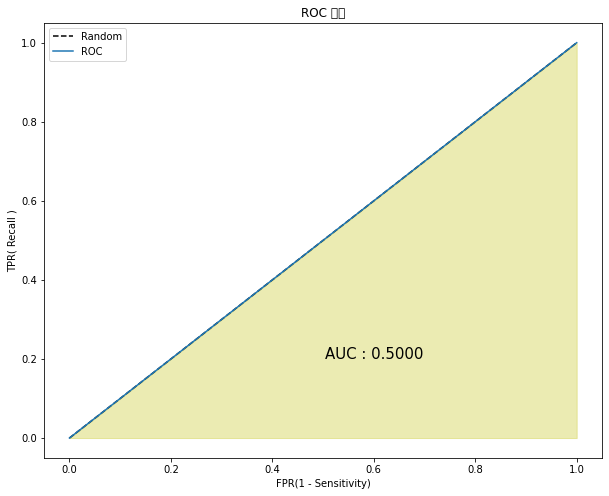

In [68]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : 0.5000', xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

### XGBoost

In [69]:
#필요한 라이브러리 임포트
from xgboost import XGBClassifier

#XGBoost 정의
#파라미터는 이전 글을 참고하여 grid 설정(dict 형태)
xgb= XGBClassifier()

xgb_param_grid={
    'max_depth' : [3,5,7,10,15],
    'max_leaves' : [200,255,300,350,400,],
    'subsample' : [0,1,2,3,4,5],
    'colsample_bytree' : [0,1,2,3,4,5]
    
}

#score종류는 acc,f1,f1_micro,f1_macro등 원하는걸로 설정)
#여기서 설정 파라미터의 갯수(총 5400개의 조합이므로 5400번의 학습이 돌아감)
xgb_grid=GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="f1", n_jobs=-1, verbose = 2,cv=TimeSeriesSplit(n_splits=6)) # 시계열기반이라 KFold가 아닌 TimeSeriesSplit 사용
xgb_grid.fit(ss_sc2, y_train) # 모델 학습하기
best_est = xgb_grid.best_estimator_ # 최적의 값 찾기
predictions_xgb = best_est.predict(x_test) # 예측하기
accuracy = accuracy_score(y_test, predictions_xgb) # 정확도확인
#best f1_macro 수치와 best parameter확인
print("best f1 : {0: .4f}".format(xgb_grid.best_score_))
print("best param : ",xgb_grid.best_params_)

# #dataframe으로 랭킹순보기
# result_df = pd.DataFrame(xgb_grid.cv_results_)
# result_df.sort_values(by=['rank_test_score'],inplace=True)

#plot
# result_df[['params','mean_test_score','rank_test_score']].head(10)
print(classification_report(y_test,predictions_xgb))
get_clf_eval(y_test, predictions_xgb)

Fitting 6 folds for each of 900 candidates, totalling 5400 fits
best f1 :  0.0546
best param :  {'colsample_bytree': 1, 'max_depth': 15, 'max_leaves': 200, 'subsample': 1}
              precision    recall  f1-score   support

           0       0.69      0.96      0.81      2156
           1       0.43      0.06      0.11       981

    accuracy                           0.68      3137
   macro avg       0.56      0.51      0.46      3137
weighted avg       0.61      0.68      0.59      3137

오차 행렬
[[2076   80]
 [ 920   61]]
정확도: 0.6812, 정밀도: 0.4326, 재현율: 0.0622, f1: 0.1087


<function matplotlib.pyplot.show(close=None, block=None)>

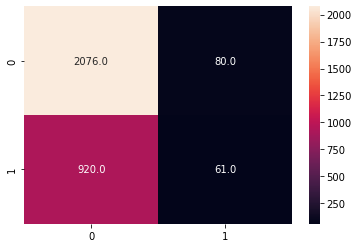

In [70]:
# 혼동행렬 시각화
cm = confusion_matrix(y_test,predictions_xgb)
sns.heatmap(cm, annot=True,fmt=".1f")
plt.show

### ROC AUC 커브

In [71]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = xgb_grid.predict_proba(x_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [   1    2    3 ... 1206 1207 1208]
샘플 index로 추출한 임곗값:  [0.83 0.79 0.78 ... 0.   0.   0.  ]
샘플 임곗값별 FPR:  [0.    0.    0.    ... 0.989 0.99  1.   ]
샘플 임곗값별 TPR:  [0.001 0.002 0.002 ... 1.    1.    1.   ]


In [72]:
from sklearn.metrics import roc_auc_score

pred_proba = xgb_grid.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.7822


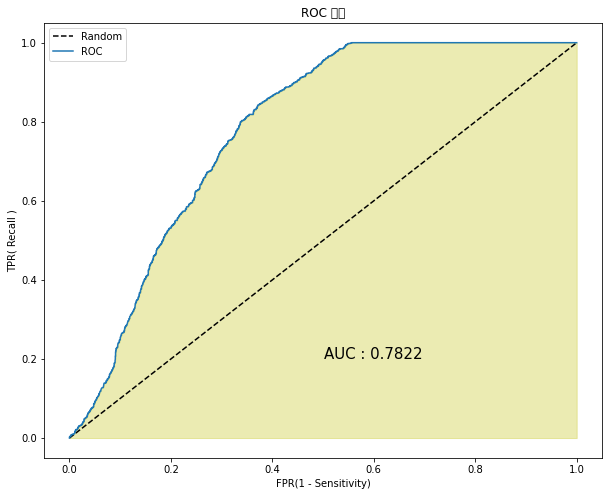

In [73]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : 0.7822', xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

#### XGboost 하이퍼파라미터 수동조작

In [76]:
import xgboost as xgb
from xgboost import XGBClassifier

# xgb_wrapper = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=5,colsmple_pytree=0.8) # 최적의하이퍼 파라미터 찾기
xgb_wrapper = XGBClassifier(max_depth=3, max_leaves=255,subsample_size=1,colsample_bytree=1)
xgb_wrapper.fit(ss_sc2, y_train)
w_preds = xgb_wrapper.predict(x_test)

get_clf_eval(y_test, w_preds)

[11:03:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "subsample_size" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


오차 행렬
[[2041  115]
 [ 868  113]]
정확도: 0.6866, 정밀도: 0.4956, 재현율: 0.1152, f1: 0.1869


<function matplotlib.pyplot.show(close=None, block=None)>

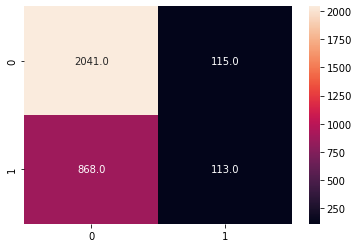

In [77]:
# 혼돈행렬 시각화
cm = confusion_matrix(y_test,w_preds)
sns.heatmap(cm, annot=True,fmt=".1f")
plt.show

### ROC AUC 커브

In [78]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = xgb_wrapper.predict_proba(x_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [   1    2    3 ... 1139 1140 1141]
샘플 index로 추출한 임곗값:  [0.92 0.87 0.86 ... 0.   0.   0.  ]
샘플 임곗값별 FPR:  [0.    0.001 0.001 ... 0.986 0.987 1.   ]
샘플 임곗값별 TPR:  [0.001 0.001 0.002 ... 1.    1.    1.   ]


In [79]:
from sklearn.metrics import roc_auc_score

pred_proba = xgb_grid.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.7822


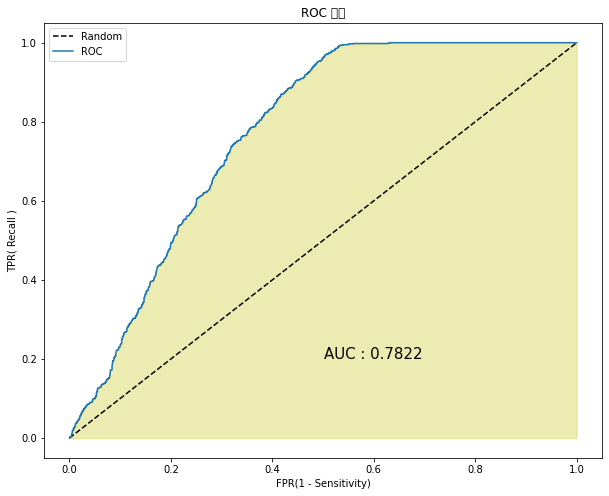

In [80]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : 0.7822', xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

### LGBM

In [81]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
start = time.time()
# parameters = {'num_leaves':[20,31,40,60,80], 'min_child_samples':[5,10,15],'max_depth':[-1,0,0,5,10],
#              'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]} # 최적의 하이퍼 파라미터 조정
parameters = {'num_leaves':[20,31,40,60,80],'max_depth':[-1,0,0,5,10],'bagging_fraction' :[0,1,2],
              'feature_fraction':[0.3,0.5,0.7,1]} # 최적의 하이퍼 파라미터 조정

lgb_clf=GridSearchCV(lgb,parameters,scoring='f1',cv=TimeSeriesSplit(n_splits=6)) # 시계열기반이라 KFold가 아닌 TimeSeriesSplit 사용
lgb_clf.fit(ss_sc2, y_train) # 모델 학습하기

print(lgb_clf.best_params_) # 최적의 하이퍼 파라미터
predicted_lgb = lgb_clf.predict(x_test) # 예측하기
print('Classification of the result is:')
print(accuracy_score(y_test, predicted_lgb)) #정확도 보기
print("best param : ",lgb_clf.best_params_)
end = time.time()
print('Execution time is:')
print(end - start)

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] bagging_fraction is set=0, subsample=1.0 will be ignored. Current value: bagging_fraction=0
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] bagging_fraction is set=0, subsample=1.0 will be ignored. Current value: bagging_fraction=0
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] bagging_fraction is set=0, subsample=1.0 will be ignored. Current value: bagging_fraction=0
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] bagging_fraction is set=0, subsample=1.0 will be ignored. Current value: bagging_fraction=0
[LightGBM] [Warning] feature_fraction is set=0.3, co

In [82]:
# LGBM 성능검증
get_clf_eval(y_test, predicted_lgb)
print(classification_report(y_test,predicted_lgb))

오차 행렬
[[2133   23]
 [ 961   20]]
정확도: 0.6863, 정밀도: 0.4651, 재현율: 0.0204, f1: 0.0391
              precision    recall  f1-score   support

           0       0.69      0.99      0.81      2156
           1       0.47      0.02      0.04       981

    accuracy                           0.69      3137
   macro avg       0.58      0.50      0.43      3137
weighted avg       0.62      0.69      0.57      3137



<function matplotlib.pyplot.show(close=None, block=None)>

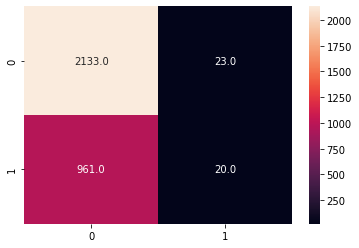

In [83]:
# 혼동행렬 시각화
cm = confusion_matrix(y_test,predicted_lgb)
sns.heatmap(cm, annot=True,fmt=".1f")
plt.show

### ROC AUC 커브

In [84]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = lgb_clf.predict_proba(x_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [   1    2    3 ... 1169 1170 1171]
샘플 index로 추출한 임곗값:  [0.76 0.67 0.64 ... 0.   0.   0.  ]
샘플 임곗값별 FPR:  [0.    0.    0.001 ... 0.984 0.986 1.   ]
샘플 임곗값별 TPR:  [0.001 0.008 0.008 ... 1.    1.    1.   ]


In [85]:
from sklearn.metrics import roc_auc_score

pred_proba = lgb_clf.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.7196


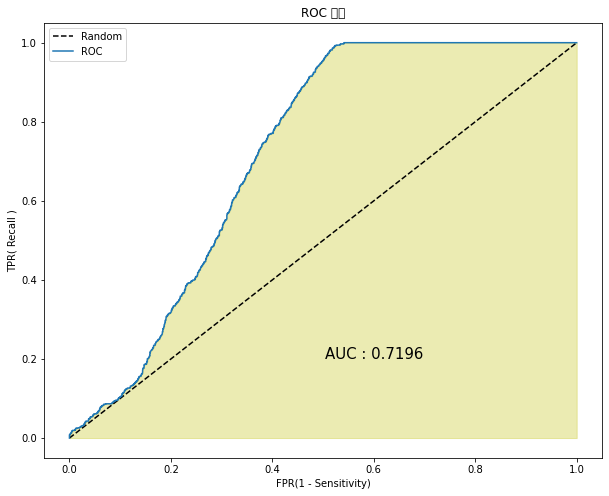

In [86]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : 0.7196', xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

# LGBM 하이퍼 파라미터 수동 조정

In [103]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
start = time.time()

lgb_cr = LGBMClassifier(learning_rate=0.1, max_depth=2,min_child_samples=2,num_leaves=255,reg_alpha=0.1,
                        feature_fraction=1) # 최적의 하이퍼 파라미터 조정
lgb_cr.fit(ss_sc2, y_train) # 학습하기
w_preds_lgb = lgb_cr.predict(x_test) # 예측하기

get_clf_eval(y_test, w_preds_lgb)

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
오차 행렬
[[1581  575]
 [ 267  714]]
정확도: 0.7316, 정밀도: 0.5539, 재현율: 0.7278, f1: 0.6291


In [104]:
# LGBM 성능검증
print(classification_report(y_test,w_preds_lgb))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      2156
           1       0.55      0.73      0.63       981

    accuracy                           0.73      3137
   macro avg       0.70      0.73      0.71      3137
weighted avg       0.76      0.73      0.74      3137



<function matplotlib.pyplot.show(close=None, block=None)>

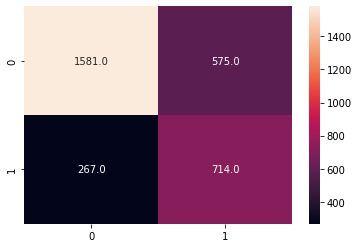

In [105]:
# 혼동행렬 시각화
cm = confusion_matrix(y_test,w_preds_lgb)
sns.heatmap(cm, annot=True,fmt=".1f")
plt.show

### ROC AUC 커브

In [106]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = lgb_cr.predict_proba(x_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 2

In [107]:
from sklearn.metrics import roc_auc_score

pred_proba = lgb_cr.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.8028


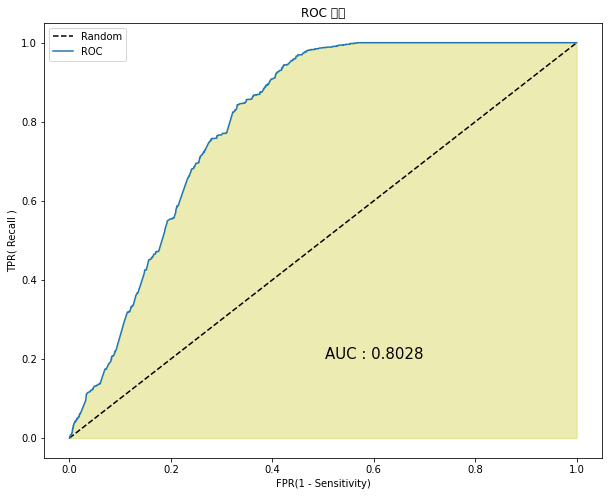

In [108]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : 0.8028', xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

#### GBM

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=144)
gb_clf.fit(ss_sc2, y_train) # 학습하기
gb_pred = gb_clf.predict(x_test) # 예측하기
gb_accuracy = accuracy_score(y_test, gb_pred) # 정확도 확인

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.6570


In [110]:
# GBM 성능검증
get_clf_eval(y_test, gb_pred)
print(classification_report(y_test,gb_pred))

오차 행렬
[[1096 1060]
 [  16  965]]
정확도: 0.6570, 정밀도: 0.4765, 재현율: 0.9837, f1: 0.6420
              precision    recall  f1-score   support

           0       0.99      0.51      0.67      2156
           1       0.48      0.98      0.64       981

    accuracy                           0.66      3137
   macro avg       0.73      0.75      0.66      3137
weighted avg       0.83      0.66      0.66      3137



<function matplotlib.pyplot.show(close=None, block=None)>

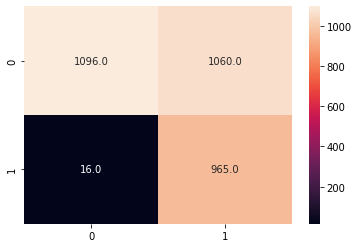

In [111]:
# 혼동행렬 시각화
cm = confusion_matrix(y_test,gb_pred)
sns.heatmap(cm, annot=True,fmt=".1f")
plt.show

### ROC AUC 확인

In [112]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = gb_clf.predict_proba(x_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [   1    2    3 ... 1085 1086 1087]
샘플 index로 추출한 임곗값:  [1.   1.   1.   ... 0.02 0.02 0.01]
샘플 임곗값별 FPR:  [0.    0.002 0.002 ... 0.989 0.99  1.   ]
샘플 임곗값별 TPR:  [0.001 0.001 0.002 ... 1.    1.    1.   ]


In [113]:
from sklearn.metrics import roc_auc_score

pred_proba = gb_clf.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.8149


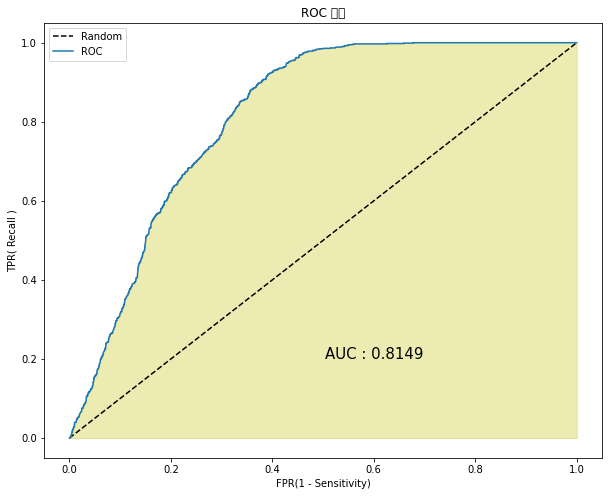

In [114]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : 0.8149', xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

In [115]:
parameters = {\
        'n_estimators':[100, 300, 500],\
        'learning_rate' : [0.025, 0.05, 0.1],
}

gb_gs = GradientBoostingClassifier()
grid_cv = GridSearchCV(gb_gs, param_grid=parameters, cv=TimeSeriesSplit(n_splits=6)) # 시계열기반이라 KFold가 아닌 TimeSeriesSplit 사용
grid_cv.fit(ss_sc2, y_train) # 학습하기

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
best_est = grid_cv.best_estimator_ # 최적의 하이퍼 파라미터

# GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
predictions_gbm = best_est.predict(x_test) # 예측하기
accuracy = accuracy_score(y_test, predictions_gbm) # 정확동보기
print('테스트 세트에서의 GBMClassifier 정확도 : {0:.4f}'.format(accuracy))


print(classification_report(y_test,predictions_gbm))

GridSearchCV 최적 하이퍼 파라미터 : {'learning_rate': 0.025, 'n_estimators': 100}
GridSearchCV 최고 정확도 :nan
테스트 세트에서의 GBMClassifier 정확도 : 0.6646
              precision    recall  f1-score   support

           0       0.70      0.89      0.78      2156
           1       0.41      0.18      0.25       981

    accuracy                           0.66      3137
   macro avg       0.56      0.53      0.52      3137
weighted avg       0.61      0.66      0.62      3137



In [116]:
get_clf_eval(y_test, predictions_gbm)

오차 행렬
[[1912  244]
 [ 808  173]]
정확도: 0.6646, 정밀도: 0.4149, 재현율: 0.1764, f1: 0.2475


#### GBM 하이퍼 파라미터 수동 조정

In [118]:
gb_clf1 = GradientBoostingClassifier(learning_rate=0.025, n_estimators=500)
gb_clf1.fit(ss_sc2, y_train)
gb1_pred = gb_clf1.predict(x_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, gb1_pred)))
get_clf_eval(y_test, gb1_pred)
print(classification_report(y_test,gb1_pred))

예측 정확도: 0.6360
오차 행렬
[[1031 1125]
 [  17  964]]
정확도: 0.6360, 정밀도: 0.4615, 재현율: 0.9827, f1: 0.6280
              precision    recall  f1-score   support

           0       0.98      0.48      0.64      2156
           1       0.46      0.98      0.63       981

    accuracy                           0.64      3137
   macro avg       0.72      0.73      0.64      3137
weighted avg       0.82      0.64      0.64      3137



<function matplotlib.pyplot.show(close=None, block=None)>

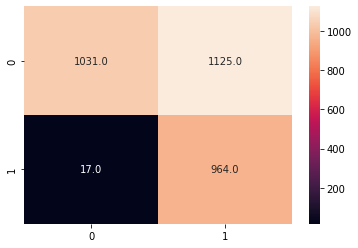

In [119]:
# 혼돈행렬 시각화
cm = confusion_matrix(y_test,gb1_pred)
sns.heatmap(cm, annot=True,fmt=".1f")
plt.show

In [120]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = gb_clf1.predict_proba(x_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [   1    2    3 ... 1077 1078 1079]
샘플 index로 추출한 임곗값:  [1.   1.   1.   ... 0.03 0.03 0.01]
샘플 임곗값별 FPR:  [0.    0.    0.001 ... 0.969 0.97  1.   ]
샘플 임곗값별 TPR:  [0.    0.003 0.003 ... 1.    1.    1.   ]


In [121]:
from sklearn.metrics import roc_auc_score

pred_proba = gb_clf1.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.8159


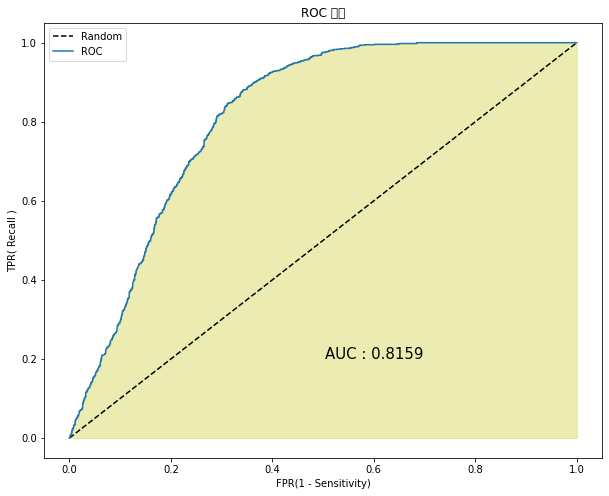

In [122]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : 0.8159', xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

### 각 모델별 피쳐중요도 보기

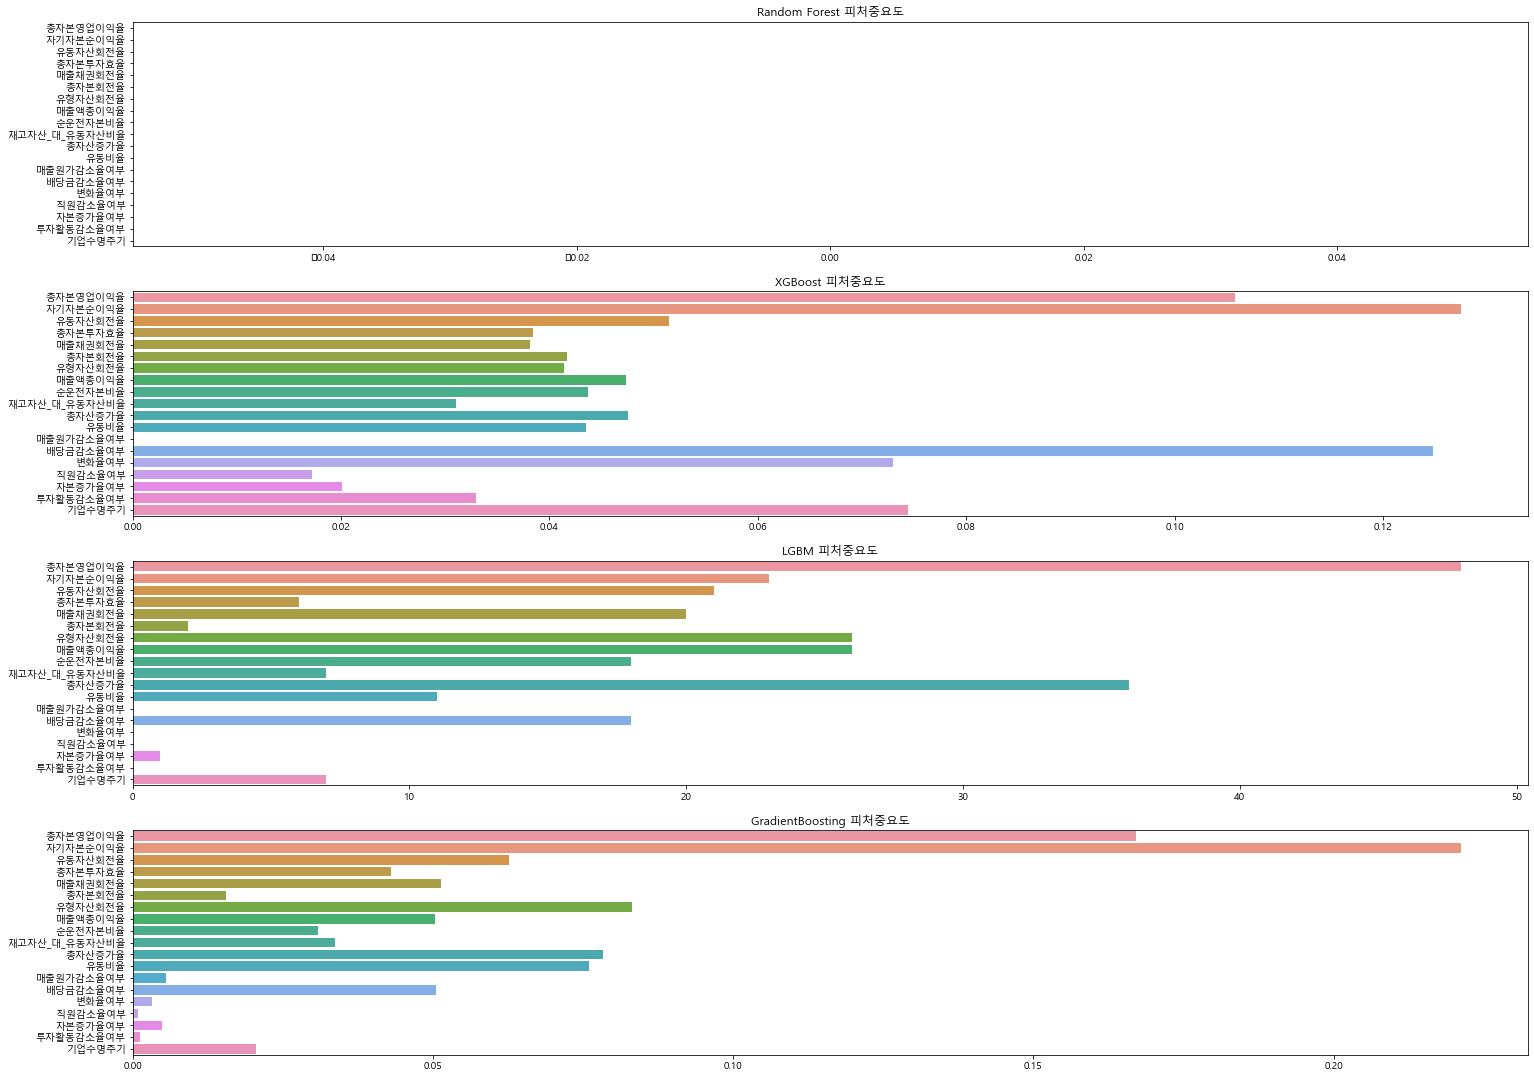

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(4, 1, squeeze=False)
fig.set_size_inches((25,19))

plt.title("피처중요도")
sns.barplot(x=rf_clf.feature_importances_, y=ss_sc2.columns, ax=axes[0,0])
axes[0,0].title.set_text("Random Forest 피처중요도")
sns.barplot(x=xgb_wrapper.feature_importances_, y=ss_sc2.columns, ax=axes[1,0])
axes[1,0].title.set_text("XGBoost 피처중요도")
sns.barplot(x=lgb_cr.feature_importances_, y=ss_sc2.columns, ax=axes[2,0])
axes[2,0].title.set_text("LGBM 피처중요도")
sns.barplot(x=gb_clf1.feature_importances_, y=ss_sc2.columns, ax=axes[3,0])
axes[3,0].title.set_text("GradientBoosting 피처중요도")

plt.show()